# K-Nearest Neighbors
## Working Principle Introduction
KNN works by calculating the distance between a query instance and all the instances in the training dataset. It then selects the 'k' nearest instances, where 'k' is a user-defined constant. The algorithm aggregates the labels or values of these nearest neighbors to predict the label or value of the query instance. In classification tasks, it often uses majority voting, while for regression, it could use the average of neighbors' values.

The core formula for KNN revolves around calculating the distance between points. A common choice for this calculation is the Euclidean distance, especially for two-dimensional data. The Euclidean distance between two points, P and Q in an n-dimensional space, is given by:

$$
d(P, Q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2}
$$

After computing distances, the algorithm selects the 'k' nearest neighbors, where 'k' is a predefined constant. 
<div align="center">
<img src="KNN.jpg" alt="alt text" width="450"/>
</div>

This image shows a 2D scatter plot with three types of data points: red dots, blue triangles, and green squares, each representing a different class. A point X is the query point for which the class is to be predicted using KNN, indicated by circles around it showing its nearest neighbors. The plot illustrates the KNN classification process in action.

## Data Processing
I've imported the necessary tools, loaded up the 'penguins' data, ditched any incomplete records, and converted categories to numbers. Then, I separated the features from the target 'species', and split the data, setting aside 30% for testing.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load penguin
penguin_data = sns.load_dataset("penguins")
penguin_data.dropna(inplace=True)

label_encoder = LabelEncoder()
penguin_data['species'] = label_encoder.fit_transform(penguin_data['species'])
penguin_data['island'] = label_encoder.fit_transform(penguin_data['island'])
penguin_data['sex'] = label_encoder.fit_transform(penguin_data['sex'])

# Prepare data
X = penguin_data.drop('species', axis=1).values
y = penguin_data['species'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


##  KNN Implementation
In this section of the code, I've defined functions essential for running the k-Nearest Neighbors algorithm. I created a distance function to measure the closeness between data points and a function to identify the 'k' nearest neighbors to a given point. A prediction function leverages these neighbors to classify a point or predict a value, depending on whether it's a classification or regression problem. I also included a function to calculate the classification error rate. I set 'k' to 5 and apply these functions to our dataset to get the classification error.

In [5]:
# Define Functions
def distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

def k_nearest_neighbors(point, training_features, training_labels, k):
    neighbors = []
    for p, label in zip(training_features, training_labels):
        d = distance(point, p)
        neighbors.append((d, label))
    neighbors.sort(key=lambda x: x[0])
    return neighbors[:k]

def KNN_Predict(point, training_features, training_labels, k, regression=False):
    neighbors = k_nearest_neighbors(point, training_features, training_labels, k)
    if not regression:
        labels = [label for _, label in neighbors]
        return max(set(labels), key=labels.count)
    else:
        values = [label for _, label in neighbors]
        return sum(values) / k

def classification_error(test_features, test_labels, training_features, training_labels, k):
    error = 0
    for point, true_label in zip(test_features, test_labels):
        predicted_label = KNN_Predict(point, training_features, training_labels, k)
        error += true_label != predicted_label
    return error / len(test_features)


# Use KNN for classification
k = 5  # Could try different value
error = classification_error(X_test, y_test, X_train, y_train, k)
print(f"Classification error for k={k}: {error:.2f}")


Classification error for k=5: 0.21


## K-Value Optimization for KNN
I've experimented with different values of 'k' for the KNN algorithm, ranging from 3 to 25, stepping by 2. For each 'k', I calculated the classification error on the test set and then plotted these errors on a graph. The plot is a red line graph that shows how the classification error varies with different 'k' values. This visualization helps in identifying the 'k' value that minimizes the error, which is key to optimizing the KNN model's performance.

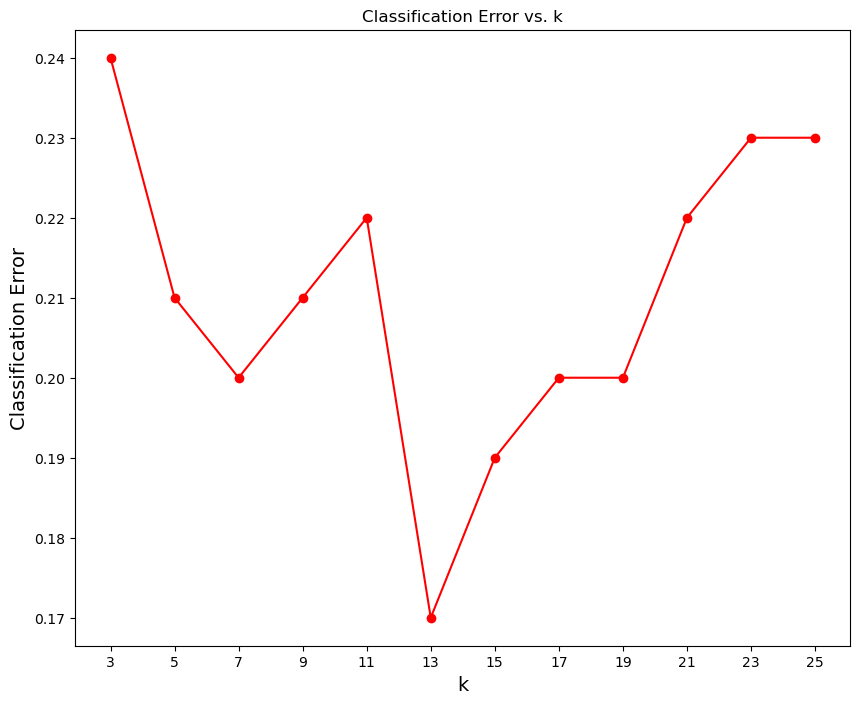

In [6]:
possible_k = [k for k in range(3, 26, 2)]

# error calculation
errors = [classification_error(X_test, y_test, X_train, y_train, k) for k in possible_k]

# error plot
plt.figure(figsize=(10, 8))
plt.plot(possible_k, errors, color='red', marker="o")
plt.xlabel('k', fontsize=14)
plt.ylabel('Classification Error', fontsize=14)
plt.xticks(possible_k)
plt.title("Classification Error vs. k")
plt.show()

## Fashion Product Recommendation System 
In this part, I set up a fashion product recommendation system. I loaded the product data, dropped irrelevant user IDs, and converted the product attributes like 'Brand', 'Category', 'Color', and 'Size' into a format my KNN algorithm can understand using label encoding. Then, I defined a function to recommend similar products based on their features. By choosing a product and specifying the number of recommendations I want, the function fetches the closest matches from the dataset. To wrap it up, I tested the function to see the top 5 suggestions for a chosen product. 

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# Data Loading
file_path = 'C:/Users/84670/Documents/fashion_products.csv'
fashion_data = pd.read_csv(file_path)
fashion_data.drop('User ID', axis=1, inplace=True)

label_encoder = LabelEncoder()
for column in ['Brand', 'Category', 'Color', 'Size']:
    fashion_data[column] = label_encoder.fit_transform(fashion_data[column])

def product_recommendations(product_id, df, k):
    # Deifine features
    features = ['Price', 'Rating', 'Brand', 'Category', 'Color', 'Size']

    # Lable Encode
    for feature in ['Brand', 'Category', 'Color', 'Size']:
        df[feature] = LabelEncoder().fit_transform(df[feature])

    # Extract features and product ids
    X = df[features].to_numpy()
    y = df["Product ID"].to_numpy()

    # Gets the feature vector for the specified product
    point = df[features].loc[df['Product ID'] == product_id].to_numpy()[0]
    neighbors = k_nearest_neighbors(point, X, y, k+1)

    # Returns the nearest neighbor product ID, excluding the target product itself
    return [x[1] for x in neighbors[1:]]

# Select a product ID to test
selected_product_id = 123  
recommendations = product_recommendations(selected_product_id, fashion_data, 5)

print("Product Recommendations:")
for i, product_id in enumerate(recommendations):
    print(f"{i+1}. {product_id}")

Product Recommendations:
1. 577
2. 632
3. 89
4. 728
5. 628


In [8]:
recommended_product_ids = [577, 632, 89, 728, 628]


product_ids = [123] + recommended_product_ids

#Retrieve information for these product ids in the dataset
products_info = fashion_data[fashion_data['Product ID'].isin(product_ids)]

print(products_info)

     Product ID Product Name  Brand  Category  Price    Rating  Color  Size
88           89        Dress      1         1     66  3.896437      4     0
122         123      Sweater      3         2     65  2.647393      5     0
576         577      T-shirt      2         2     66  2.160696      4     1
627         628      Sweater      3         2     64  3.812676      3     2
631         632        Dress      4         0     66  3.755338      5     1
727         728        Dress      4         1     63  2.409416      5     2


## Conclusion
In my work with KNN, I first handled the prep work—encoding categories and cleaning the data. I then wrote functions for the KNN algorithm, starting with 'k' at 5, which gave a classification error of 0.21. Afterward, I tweaked 'k' to minimize error and applied KNN to build a neat little fashion recommendation system. 